# Chapter 6. AI 기초 - Classification & Clustering
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/
* Classification : 소속 집단의 정보를 이미 알고 있는 상태에서 비슷한 집단으로 묶는 방법
* Clustering : 소속 집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 방법

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Classification

## 1). KNN
* 알고리즘이 매우 단순하고, 직관적이며, 사전 학습이나 특별한 준비 시간이 필요 없다는 장점이 있다.
* 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다.
* 데이터가 많을 때 적절한 모델이라고 보기는 힘들다.

### Data
* 으뜸 머신러닝 p.134

In [2]:
# 닥스훈트
d_l = [77,78,85,83,73,77,73,80]
d_h = [25,28,29,30,21,22,17,35]
# 사모예드
s_l = [75,77,86,86,79,83,83,88]
s_h = [56,57,50,53,60,53,49,61]

### Scatter Plot

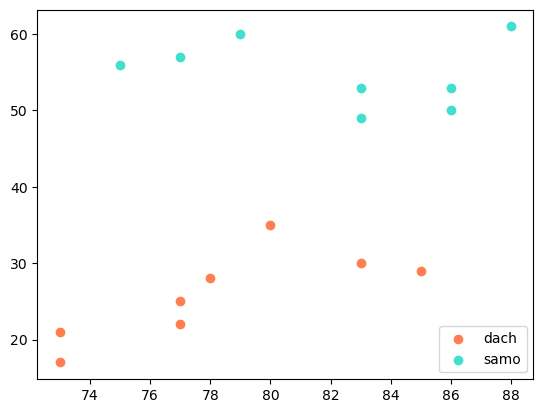

In [3]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')

plt.legend(loc = 'lower right')
plt.show()

### New Data 1

In [4]:
new_l = [79]
new_h = [35]

### Scatter Plot

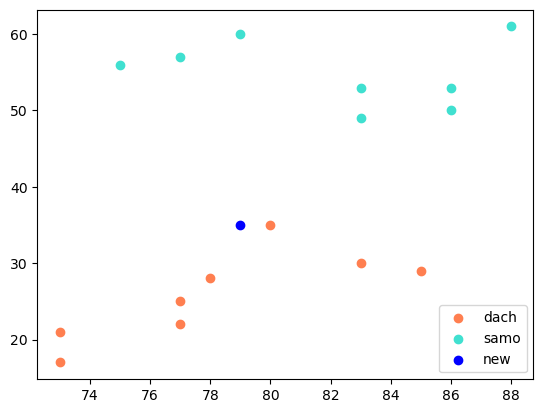

In [5]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')
plt.scatter(new_l, new_h, label = 'new', color = 'b')

plt.legend(loc = 'lower right')
plt.show()

* 새로운 데이터는 닥스훈트라고 볼 수 있다.

### New Data 2

In [6]:
new_l = [82]
new_h = [40]

### Scatter Plot

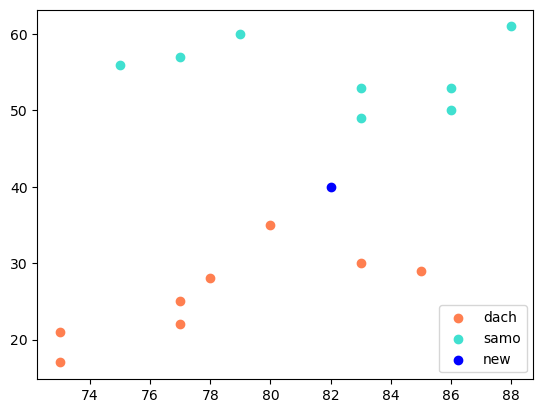

In [7]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')
plt.scatter(new_l, new_h, label = 'new', color = 'b')

plt.legend(loc = 'lower right')
plt.show()

* 새로운 데이터가 어떤 품종인지 그래프로는 파악이 어렵다.

### Modeling

#### Data

In [8]:
# 닥스훈트
X_d = np.column_stack([d_l,d_h])  # 2개의 배열 여러값이  있는걸 1개씩 뽑아서 2 열인 ~ 행으로 만듬
Y_d = np.zeros(len(X_d))  # 모든걸 0 로 만듬. 
# 사모예드
X_s = np.column_stack([s_l,s_h])
Y_s = np.ones(len(X_s)) #모든걸 1로 만듬
# Train Data
X_train = np.concatenate([X_d, X_s]) #값있는 d 값 콜룸스택한 배열  , 값있는 s 값 콜룸스택한 배열 합침
Y_train = np.concatenate([Y_d, Y_s]) 
# New Data
X_test = np.array([[82,40]])

#### KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [10]:
knn = KNNC(n_neighbors = 3)
knn.fit(X_train, Y_train)

knn.predict(X_test)

array([0.])

* 0 : 닥스훈트로 예측

## 2). Confusion Matrix

### 이진 분류의 0과 1
* 이진 분류에서 데이터의 수가 작은 것을 1로 설정
* 데이터의 수가 많은 것을 0으로 설정하는 것이 좋다.

### F1-score
* 재현율(recall)과 정밀도(precision)라는 각각의 지표는 관심있는 척도가 다르기 때문에 하나의 척도만을 측정 방법으로 사용할 경우 왜곡이 발생
* 두 지표(재현율과 정밀도)의 조화 평균이 F1 score
* 0과 1의 비율이 같다면 Accuracy와 같은 값이 나온다.

In [12]:
target = np.array([0] * 15 + [1] * 5)
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])
print('target : {}, pred : {}'.format(len(target),len(pred)))

target : 20, pred : 20


In [11]:
from sklearn.metrics import confusion_matrix


In [16]:
confusion_matrix(target, pred)
# 위의 코드는 sklearn.metrics 모듈에서 confusion_matrix 함수를 사용하여 혼동 행렬(Confusion Matrix)을 생성하는 예시.

# 혼동 행렬은 분류 모델의 예측 결과와 실제 타깃 값 사이의 관계를 나타내는 표. 
#이를 통해 모델의 분류 성능을 평가하고, 각각의 예측 결과에 대한 정보를 제공.

# 위의 코드에서는 예측 결과인 pred와 실제 타깃 값인 target을 사용하여 혼동 행렬을 생성하고 출력


# 혼동 행렬은 모델의 분류 성능을 평가하고, 클래스별 예측 결과를 분석하는 데 사용됨.
#이를 통해 모델의 강점과 약점을 파악, 필요에 따라 정밀도, 재현율, F1 점수 등 다른 평가 지표를 계산할 수 있음.

array([[7, 8],
       [2, 3]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [136]:
print('Accuracy  : {:.4f}'.format(accuracy_score(target, pred)))
print('Precision : {:.4f}'.format(precision_score(target, pred)))
print('Recall    : {:.4f}'.format(recall_score(target, pred)))
print('F1-score  : {:.4f}'.format(f1_score(target, pred)))

Accuracy  : 0.5000
Precision : 0.2727
Recall    : 0.6000
F1-score  : 0.3750


In [137]:
#ROC
#AUC



In [32]:
from sklearn.datasets import load_iris
iris= load_iris()

X = iris.data #x
y = iris.target #y
mask =y != 0 #0이 아닌걸 true 
X = X[mask]  #그리고 true인걸 x 에 넣음 (0을 다 제거)
y = y[mask]  

y = y - 1   # 1 과 2밖에 없는데 0 과 1로 만들려면 1뺴줌. 
X = X[:,[0,2]] #X 0번째 2번째 만 뽑아낼때

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)
# 클래스 레이블인 y를 기준으로 데이터를 계층화하여 나누라는 의미입니다.
lr = LogisticRegression(solver="liblinear", C=0.0001, random_state = 1 )
lr.fit(X_train,y_train)

LogisticRegression(C=0.0001, random_state=1, solver='liblinear')

In [22]:
prob = lr.predict_proba(X_test) 

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score

# y_test에 대해 , FPR(False Positive Rate), TPR(True Positive Rate) 및 임계값(threshold)을 계산합니다
# oc_auc_score(y_test, prob[:,1])는 실제 타깃 값인 y_test와 모델의 예측 확률(prob) 중 
# 클래스 1에 해당하는 확률(prob[:,1])을 입력으로 받아 ROC 곡선의 AUC 값을 계산
fpr ,tpr , thres = roc_curve(y_test, prob[:,1])


# FPR
# array([0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.6       , 0.73333333, 1.        ]),

# TPF
#  array([0.        , 0.06666667, 0.66666667, 0.8       , 1.        ,
#         1.        , 1.        , 1.        ]),

#THRES
#  array([1.99998352e+00, 9.99983516e-01, 9.51149674e-01, 9.35692933e-01,
#         5.13427916e-01, 1.18267704e-02, 1.02402251e-02, 1.65951285e-03]))
roc_auc_score(y_test, prob[:,1])

0.962962962962963

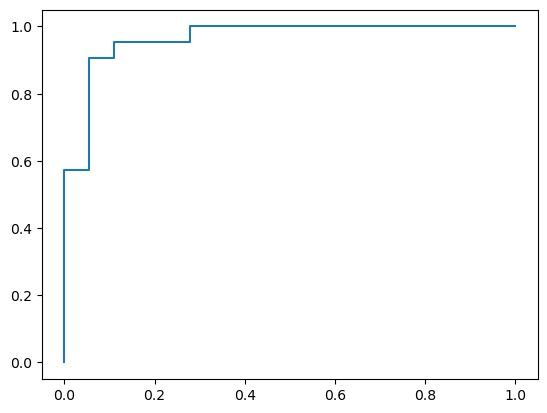

In [24]:
plt.figure()
plt.plot(fpr,tpr)
plt.show()

In [143]:
#앙상블 (Ensemble) 은 머신러닝분야의 집단지성
# 여러분류기가 각자의 분류 결과를 투표하듯이 내어 놓으면 가장 많은 표를 얻은 결과를 최정결과로 선택하는 것 


#분류기 성격이 모두 동일해 오분류도 비슷한 상황에서 일어난다면 모두가 한꺼번에 잘못된 투포를 할 확률이 높음
#그래서 모델의 성격이 서로 다른 것이 좋다.
#개별 분류기의 다양성(diversity) 이라고 한다.

#분류기 다양성 확보방법 
#1 서로 다른 모델로 각각의 분류기를 만들기
#2 각각의 분류기에 대해 서로 다른 학습 데이터를 제공해 훈련

#분류기에 선택된 데이터가 다른분류기의 학습에도 사용될 수 있으면 ★배깅 (bagging) 기법
#불가능하면 페이스팅(pasting) 이라고 부름
#배깅 기법을 개선한게 부스팅(boosting) 기법 - 이전모델이 예측을 잘못한 샘플에 가중치 부여해 다음모델 학습잘하도록 도움. 

#부스팅 알고리즘은 AdaBoost 가장 일반적으로 사용
     #- 각데이터 인스턴스는 동일한 가중치로 초기화
     #- 예측기를 순차적으로 학습
     #- 한 예측기가 잘못분류한 데이터 인스턴스의 가중치를 높임
     #- 다음 예측기는 높은 가중치의 데이터 인스턴스에 적합하게 학습

In [25]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
mask = y != 2 #2가 아닌것들만 True 로 

X= X[mask] #2 모두제거. 
y= y[mask] #2 빼고 0 1 만 남기기 

In [26]:
from sklearn.ensemble import BaggingClassifier #앙상블 2가지.  , BaggingClassifier -> 분류하는것 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)
lr = LogisticRegression(solver="liblinear", C=1, random_state = 1 )
bag = BaggingClassifier(base_estimator= lr , n_estimators=500 , #Logistic regression 이 500개가 만들어짐 
                        n_jobs= 8) #cpu 코어 최대개수  (-1 로도 사용가능)
bag.fit(X_train,y_train)
p_test = bag.predict(X_test) 

In [29]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

print(f1_score(y_test, p_test))

lr.fit(X_train,y_train)
print(f1_score(y_test,lr.predict(X_test)))

0.975609756097561
0.9523809523809523


In [147]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=lr , n_estimators= 500 ,
                        learning_rate= 0.1)

ada.fit(X_train, y_train)
p_test = ada.predict(X_test)
f1_score(y_test,p_test) 

#데이터가 많으면 강력하지만
#데이터수가 너무 적다면 성능이 떨어짐 안쓰느니 못함

# AdaBoostClassifier는 분류 문제에 주로 사용되며, 이진 분류와 다중 클래스 분류에 모두 적용될 수 있음.
# 약한 학습기의 종류(base_estimator), 약한 학습기 개수(n_estimators), 가중치 갱신 방식(algorithm), 학습률(learning_rate) 등이 있음.

0.9

In [148]:
# 결정트리 (Decision tree) 는 귀납추론을 위해 자주 사용되는 실용적인 방법
# 데이터들을 트리구조의 루트(root)에서 시작해 중간 노드(internal node)를 거쳐 단말노드(leaf node)에 배정하는기능수행.
# 루트를 제외한 다른조건을 ★노드 라고함.  결과를 leaf  , 중간에 선그어져있는걸 branch (가지)

#장점
#- 학습이 되고 나면 트리정보(노드들)를 뽑아낼수가있다. 
#- A랑 B랑 구분하는데 중요한 속성(특성)들이 뭔지 알수있음. 


In [149]:
# 엔트로피  의미만알기 결정트리는 정보량을 최소화해서 나타내서 학습, 
#          결정트리의 손실함수인데 그것을 측정

#좋은분할이라면 데이터가 더 잘 나누어 져야함
#원래의 정보량에서 분할후의 정보량을 뺀값이 커질수록 좋다는것이며 이를 정보이득 이라고 정의 

In [33]:
X = iris.data
y = iris.target


In [34]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [36]:
#결정트리를 시각화 하기위해서 sklearn에서 만든 것
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = ("iris_tree.dot"), feature_names= iris.feature_names)

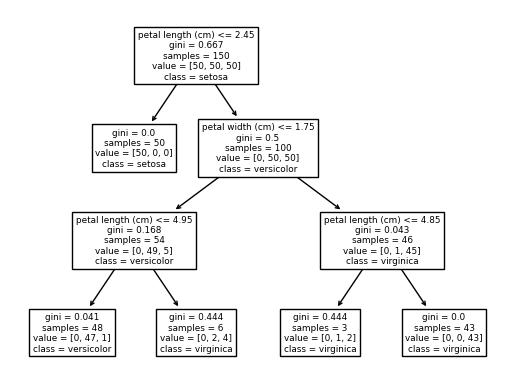

In [37]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()